https://www.kaggle.com/gaganmaahi224/marvel-theme-women-in-survey

https://www.kaggle.com/kamaljp/stories-of-kagglers-2021-by-plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DATASET_LOC = "Obj2_Dataset/kaggle_survey_2021_responses.csv"

In [3]:
raw_dataset_stage_1 = pd.read_csv(DATASET_LOC, low_memory=False, skiprows=[0])
raw_dataset_stage_1

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25969,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25971,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
raw_dataset_stage_2 = raw_dataset_stage_1.iloc[:, 2:9]
raw_dataset_stage_3 = raw_dataset_stage_2.drop(raw_dataset_stage_2.columns[[2, 4]], axis=1)
raw_dataset_stage_3.columns = ["Sex", "Country", "Role", "Python", "R"]
dataset = raw_dataset_stage_3.copy()
dataset.head()

,Sex,Country,Role,Python,R
0,Man,India,Other,Python,R
1,Man,Indonesia,Program/Project Manager,NaN,NaN
2,Man,Pakistan,Software Engineer,Python,NaN
3,Man,Mexico,Research Scientist,Python,NaN
4,Man,India,Other,Python,NaN


In [5]:
dataset.isnull().sum()

Sex            0
Country        0
Role           0
Python      4113
R          20639
dtype: int64

In [120]:
dataset.describe()

,Sex,Country,Role,Python,R
count,25973,25973,25973,21860,5334
unique,5,66,15,1,1
top,Man,India,Student,Python,R
freq,20598,7434,6804,21860,5334


In [6]:
print("Total Responses Got:", len(dataset))
print("\n---------- Out Of Them ----------\n")

sex_responses_ratio = dataset['Sex'].value_counts()

print("Male   -> ", sex_responses_ratio['Man'])
print("Female -> ", sex_responses_ratio['Woman'])
print("\n---------- Out Of Them ----------\n")

print(sex_responses_ratio)

Total Responses Got: 25973

---------- Out Of Them ----------

Male   ->  20598
Female ->  4890

---------- Out Of Them ----------

Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: Sex, dtype: int64


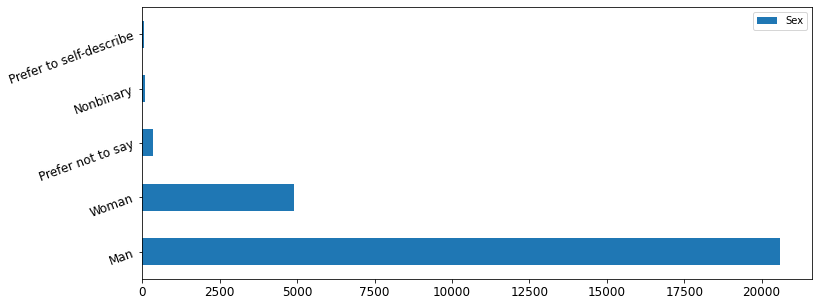

In [122]:
sex_responses_ratio = dataset['Sex'].value_counts()
sex_responses_ratio.plot.barh(rot=20, figsize=(12,5)).legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

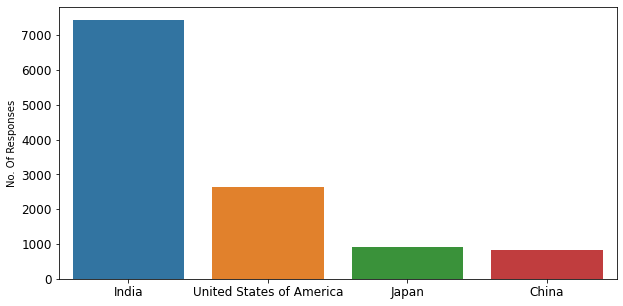

In [136]:
country_responses_ratio = dataset['Country'].value_counts()[:5].drop("Other")
# country_responses_ratio.plot.barh(rot=20, figsize=(12,5)).legend()
plt.figure(figsize=(10,5))
sns.barplot(x=country_responses_ratio.index, y=country_responses_ratio)
plt.ylabel("No. Of Responses")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()